# Introduction to Logistic Regression

Logistic regression is another technique borrowed by machine learning from the field of statistics.
It is the go-to method for binary classification problems (problems with two class values).Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

So how does it work? Just like a Linear Regression model, a Logistic Regression
model computes a weighted sum of the input features (plus a bias term), but instead
of outputting the result directly like the Linear Regression model does, it outputs the
logistic of this result.


The logistic function, also called the sigmoid function was developed by statisticians to describe
properties of population growth in ecology, rising quickly and maxing out at the carrying
capacity of the environment. It’s an S -shaped curve that can take any real-valued number and
map it into a value between 0 and 1, but never exactly at those limits.

The logistic—also called the logit, noted σ(·)—is a sigmoid function (i.e., S-shaped)
that outputs a number between 0 and 1.

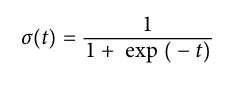


Where e is the base of the natural logarithms (Euler’s number or the EXP() function in your
spreadsheet) and t is the actual numerical value that you want to transform.


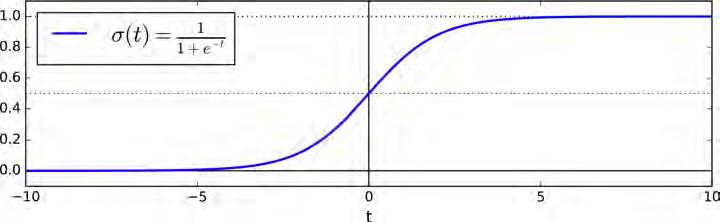

Logistic regression uses an equation as the representation, very much like linear regression.
Input values (x) are combined linearly using weights or coefficient values to predict an output
value (y). A key difference from linear regression is that the output value being modeled is a
binary values (0 or 1) rather than a numeric value.

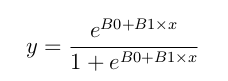

Where y is the predicted output, B0 is the bias or intercept term and B1 is the coefficient
for the single input value (x). Each column in your input data has an associated B coefficient
(a constant real value) that must be learned from your training data. The actual representation
of the model that you would store in memory or in a file are the coefficients in the equation
(the beta value or B’s).

Logistic regression models the probability of the default class.For example,
if we are modeling people’s sex as male or female from their height, then the first class could
be male and the logistic regression model could be written as the probability of male given a
person’s height, or more formally:

                P (sex = male|height)
               
Written another way, we are modeling the probability that an input (X) belongs to the
default class (Y = 1), we can write this formally as:

                P(X) = P(Y = 1|X)

Note that the probability prediction must be transformed into a binary values (0 or 1) in order
to actually make a crisp prediction.

Logistic regression is a linear method, but the predictions are transformed using the logistic
function. The impact of this is that we can no longer understand the predictions as a linear
combination of the inputs as we can with linear regression

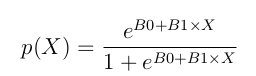


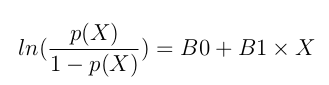

This is useful because we can see that the calculation of the output on the right is linear again
(just like linear regression), and the input on the left is a natural logarithm of the probability of
the default class. This ratio on the left is called the odds of the default class. Odds are
calculated as a ratio of the probability of the event divided by the probability of not the event. So we could instead write:

                                        ln(odds) = B0 + B1 × X

Because the odds are log transformed, we call this left hand side the log-odds or the probit.

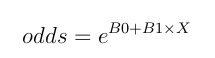

Here the model is still a linear combination of the
inputs, but this linear combination relates to the log-odds of the default class.

The coefficients of the logistic regression algorithm must be estimated from your training data.

The best coefficients would result in a model that would predict a value very close to 1 (e.g.
male) for the default class and a value very close to 0 (e.g. female) for the other class.

Making predictions with a logistic regression model is as simple as plugging in numbers into the
logistic regression equation and calculating a result. Let’s make this concrete with a specific
example. Let’s say we have a model that can predict whether a person is male or female based
on their height (completely fictitious). Given a height of 150 cm is the person male or female.
We have learned the coefficients of B0 = −100 and B1 = 0.6. Using the equation above we can
calculate the probability of male given a height of 150 cm or more formally P (male|height = 150).


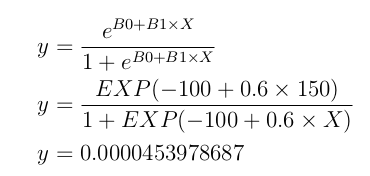

Or a probability of near zero that the person is a male. In practice we can use the probabilities
directly. Because this is classification and we want a crisp answer, we can snap the probabilities
to a binary class value, for example

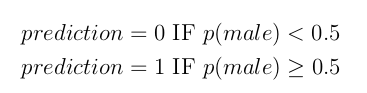

This dataset has two input variables (X1 and
X2) and one output variable (Y ). The input variables are real-valued random numbers drawn
from a Gaussian distribution. The output variable has two values, making the problem a binary
classification problem.

In [1]:
X1 = [
2.7810836,
1.465489372,
3.396561688,
1.38807019,
3.06407232,
7.627531214,
5.332441248,
6.922596716,
8.675418651,
7.673756466]

X2 = [
2.550537003,
2.362125076,
4.400293529,
1.850220317,
3.005305973,
2.759262235,
2.088626775,
1.77106367,
-0.242068655,
3.508563011]

Y = [
    0,
0,
0,
0,
0,
1,
1,
1,
1,
1]

The logistic regression model takes real-valued inputs and makes a prediction as to the probability
of the input belonging to the default class (class 0). If the probability is greater than 0.5 we can
take the output as a prediction for the default class (class 0), otherwise the prediction is for
the other class (class 1). For this dataset, the logistic regression has three coefficients just like
linear regression

output = B0 + B1 × X1 + B2 × X2

The job of the learning algorithm will be to discover the best values for the coefficients (B0,
B1 and B2) based on the training data. Unlike linear regression, the output is transformed into
a probability using the logistic function:

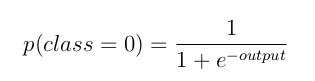

Logistic Regression model in vectorized form can be written as:

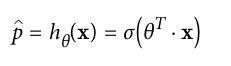


Now we know how a Logistic Regression model estimates probabilities and
makes predictions. But how is it trained? The objective of training is to set the parameter vector θ so that the model estimates high probabilities for positive instances (y =
1) and low probabilities for negative instances (y = 0). This idea is captured by the
cost function of a single training instance x

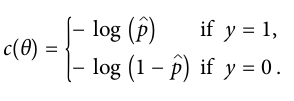


This cost function makes sense because – log(t) grows very large when t approaches
0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will also be very large if the model estimates a probability close to 1
for a negative instance. On the other hand, – log(t) is close to 0 when t is close to 1, so
the cost will be close to 0 if the estimated probability is close to 0 for a negative
instance or close to 1 for a positive instance, which is precisely what we want.


The cost function over the whole training set is simply the average cost over all training instances. It can be written in a single expression, called
the log loss.


Logistic Regression cost function (log loss)
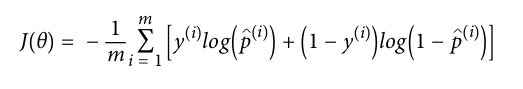


This cost function is convex, so Gradient Descent (or any
other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is not too large and you wait long enough). The partial derivatives of the cost
function with regards to the j th model parameter θ j is given by

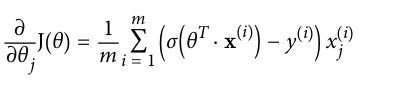

It tells us how loss would change if we modified the parameters.


For each instance it computes the
prediction error and multiplies it by the j th feature value, and then it computes the
average over all training instances. Once you have the gradient vector containing all
the partial derivatives you can use it in the Batch Gradient Descent algorithm.


We can estimate the values of the coefficients using stochastic gradient descent. We can apply
stochastic gradient descent to the problem of finding the coefficients for the logistic regression
model.

Let’s start off by assigning 0.0 to each coefficient and calculating the probability of the first
training instance that belongs to class 0.

B0 = 0.0

B1 = 0.0

B2 = 0.0

The first training instance is: X1 = 2.7810836, X2 = 2.550537003, Y = 0. Using the above
equation we can plug in all of these numbers and calculate a prediction:

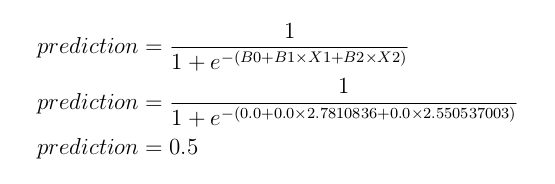

We can calculate the new coefficient values using a simple update equation.

                    b = b + alpha × (y − prediction) × prediction × (1 − prediction) × x

Where b is the coefficient we are updating and prediction is the output of making a prediction
using the model. Alpha is a parameter that you must specify at the beginning of the training
run. This is the learning rate and controls how much the coefficients (and therefore the model)
changes or learns each time it is updated.

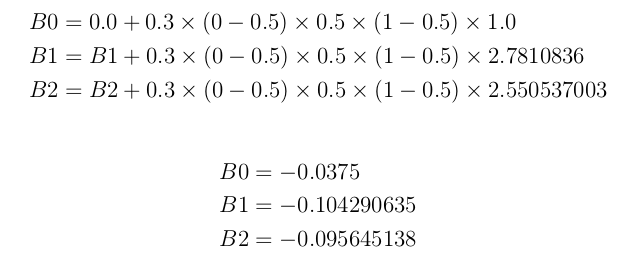

We can repeat this process and update the model for each training instance in the dataset. A
single iteration through the training dataset is called an epoch. It is common to repeat the
stochastic gradient descent procedure for a fixed number of epochs. At the end of epoch you
can calculate error values for the model

The coefficients calculated after 10 epochs of stochastic gradient descent are:
    
B0 = −0.406605464

B1 = 0.852573316

B2 = −1.104746259

Now that we have trained the model, we can use it to make predictions. We can make predictions
on the training dataset, but this could just as easily be new data. Using the coefficients above
learned after 10 epochs, we can calculate output values for each training instance

Finally, we can calculate the accuracy for the model on the training dataset:
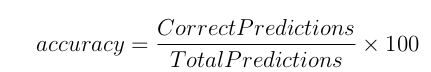

In [2]:
# Logistic Regression on Diabetes Dataset
from random import seed
from random import randrange
from csv import reader
from math import exp

In [3]:
# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

In [4]:
# Test the logistic regression algorithm on the diabetes dataset
seed(1)
# load and prepare data
filename = 'diabetes.csv'

In [5]:
# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

In [6]:
dataset = load_csv(filename)
dataset = dataset[1:]
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)

In [7]:
# print(dataset)

In [8]:
# Find the min and max values for each column
def dataset_minmax(dataset):
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

In [9]:
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

In [10]:
# normalize
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)

In [11]:
# print(dataset)

In [12]:
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

In [13]:
# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return 1.0 / (1.0 + exp(-yhat))

In [14]:
# Estimate logistic regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        for row in train:
            yhat = predict(row, coef)
            error = row[-1] - yhat
            coef[0] = coef[0] + l_rate * error * yhat * (1.0 - yhat)
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] + l_rate * error * yhat * (1.0 - yhat) * row[i]
    return coef

In [15]:
# Linear Regression Algorithm With Stochastic Gradient Descent
def logistic_regression(train, test, l_rate, n_epoch):
    predictions = list()
    coef = coefficients_sgd(train, l_rate, n_epoch)
    for row in test:
        yhat = predict(row, coef)
        yhat = round(yhat)
        predictions.append(yhat)
    return(predictions)

In [16]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [17]:
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

In [18]:
# evaluate algorithm
n_folds = 5
l_rate = 0.1
n_epoch = 300
scores = evaluate_algorithm(dataset, logistic_regression, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [75.16339869281046, 78.43137254901961, 82.35294117647058, 75.16339869281046, 75.16339869281046]
Mean Accuracy: 77.255%


In [19]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [20]:
df = pd.read_csv('diabetes.csv')

In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
df.shape

(768, 9)

In [24]:
X = df.drop(df.columns[[8]], axis=1)
y = df.drop(df.columns[[0,1,2,3,4,5,6,7]], axis=1)
#
scaler = StandardScaler()
X_new = scaler.fit_transform(X)
#
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [25]:
clf = LogisticRegression()

In [26]:
clf.fit(X_train, y_train)

/home/omkar/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:725: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
print (clf.intercept_, clf.coef_)

[-0.85571126] [[ 0.21621911  1.06930435 -0.2587175   0.0472661  -0.19919621  0.7920862
   0.22695841  0.43005814]]


In [28]:
pred = clf.predict(X_test)

In [29]:
print ('Accuracy from sk-learn: {0}'.format(clf.score(X_test, y_test)))

Accuracy from sk-learn: 0.7532467532467533


### Problem Statement - 

An expert botanist has identified species of iris as setosa, versicolor, or virginica. A new hobby botanist is interested in distinguishing the species of some
iris flowers that she has found.(Here we are assuming setosa, versicolor, or virginica are the only species our hobby botanist will encounter in the wild.) She has collected some measurements associated with
each iris: the length and width of the petals and the length and width of the sepals, all
measured in centimeters. Our goal is to build a machine learning model that can learn from the measurements
of these irises whose species is known, so that we can predict the species for a new
iris

In [30]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [31]:
df = pd.read_csv('iris-data.csv')

In [32]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [35]:
df.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [36]:
#Removing all null values row
df = df.dropna(subset=['petal_width_cm'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    145 non-null float64
sepal_width_cm     145 non-null float64
petal_length_cm    145 non-null float64
petal_width_cm     145 non-null float64
class              145 non-null object
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [37]:
#plot
# sns.pairplot(df, hue='class', size=2.5)

In [38]:
df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    45
Iris-setosa        44
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

Two observations can be made from the above results
- For 5 data points 'Iris-versicolor' has been specified as 'versicolor' 
- For 1 data points, 'Iris-setosa' has been specified as 'Iris-setossa'

In [39]:
df['class'].replace(["Iris-setossa","versicolor"], ["Iris-setosa","Iris-versicolor"], inplace=True)
df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        45
Name: class, dtype: int64

### Simple Logistic Regression

Consider only two class 'Iris-virginica' and 'Iris-versicolor'. Dropping all other class

In [40]:
final_df = df[df['class'] != 'Iris-setosa']

In [41]:
final_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [42]:
final_df.shape

(100, 5)

#### Outlier Check

An outlier is an observation that is unlike the other observations.

It is rare, or distinct, or does not fit in some way.

Outliers can have many causes, such as:
    * Measurement or input error.
    * Data corruption.
    * True outlier observation 

/home/omkar/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/home/omkar/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


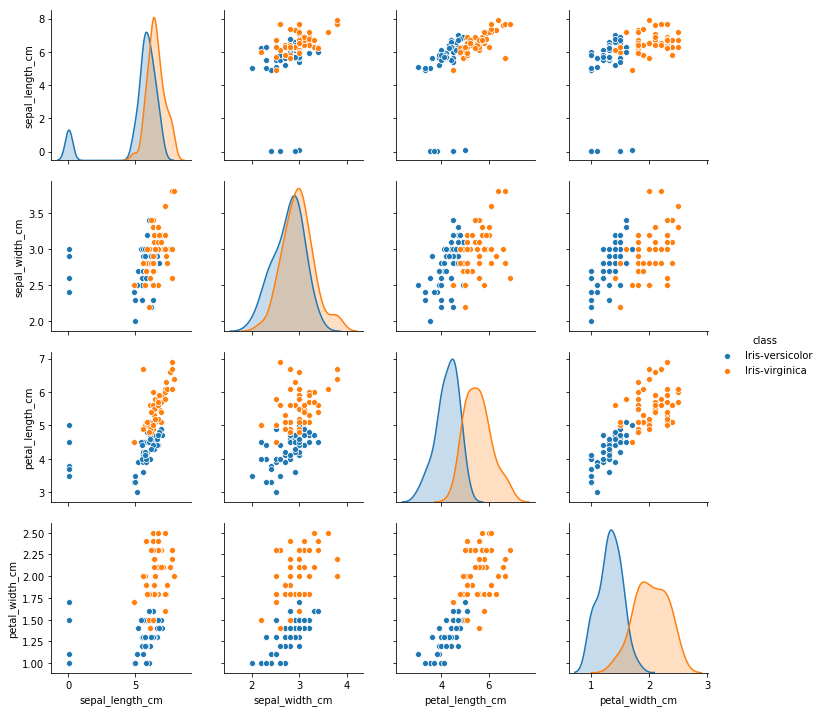

In [43]:
sns.pairplot(final_df, hue='class', size=2.5)

From the above plot, sepal_width and sepal_length seems to have outliers. To confirm let's plot them seperately

SEPAL LENGTH

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b5b4fb390>]],
      dtype=object)

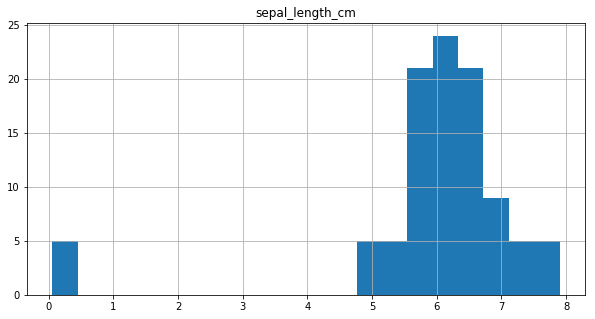

In [44]:
final_df.hist(column = 'sepal_length_cm',bins=20, figsize=(10,5))

It can be observed from the plot, that for 5 data points values are below 1 and they seem to be outliers. So, these data points
are considered to be in 'm' and are converted to 'cm'.

/home/omkar/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b5b1b1320>]],
      dtype=object)

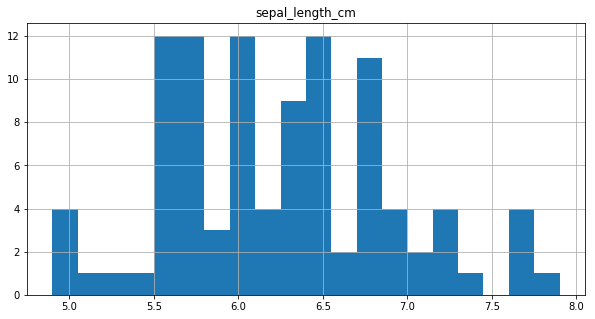

In [45]:
final_df.loc[final_df.sepal_length_cm < 1, ['sepal_length_cm']] = final_df['sepal_length_cm']*100
final_df.hist(column = 'sepal_length_cm',bins=20, figsize=(10,5))

SEPAL WIDTH

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b5850ecc0>]],
      dtype=object)

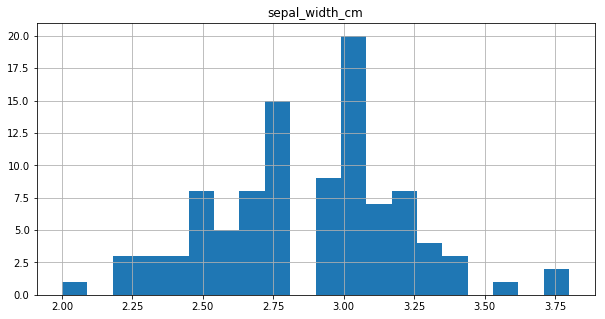

In [46]:
final_df.hist(column = 'sepal_width_cm',bins=20, figsize=(10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b5850e4e0>]],
      dtype=object)

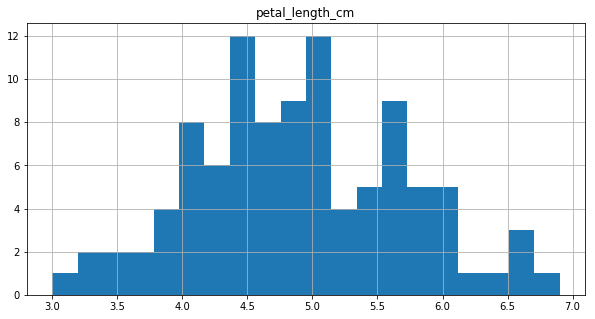

In [47]:
final_df.hist(column = 'petal_length_cm',bins=20, figsize=(10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b584185c0>]],
      dtype=object)

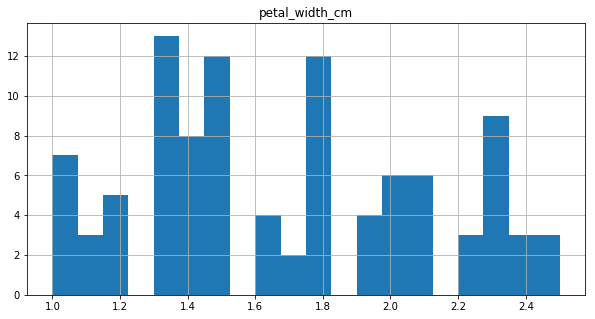

In [48]:
final_df.hist(column = 'petal_width_cm',bins=20, figsize=(10,5))

/home/omkar/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


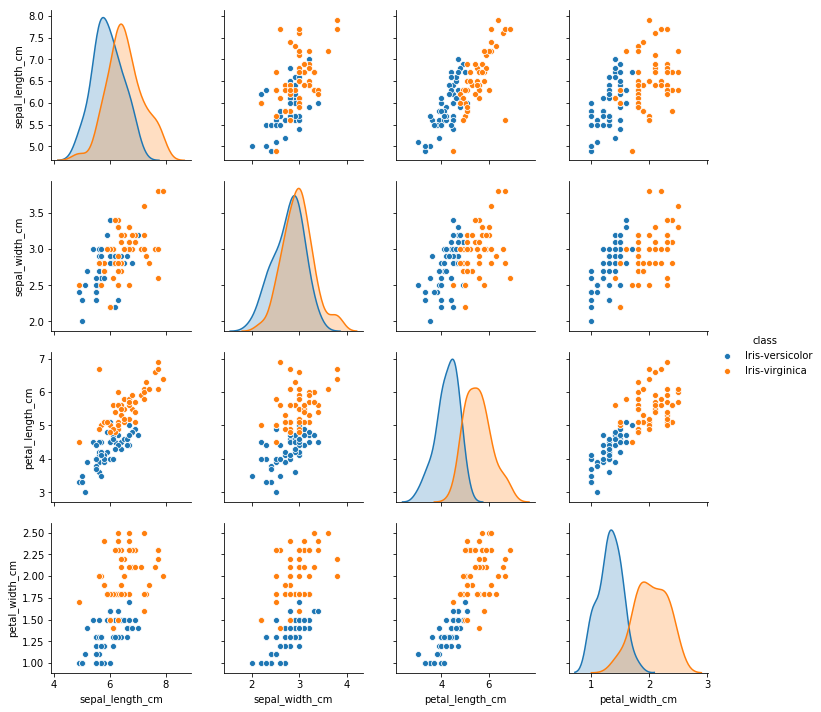

In [49]:
sns.pairplot(final_df, hue='class', size=2.5)

Successfully removed outliers!!

### Label Encoding

In [50]:
final_df['class'].replace(["Iris-virginica","Iris-versicolor"], [1,0], inplace=True)

/home/omkar/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [51]:
final_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [52]:
inp_df = final_df.drop(final_df.columns[[4]], axis=1)
out_df = final_df.drop(final_df.columns[[0,1,2,3]], axis=1)
#
scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)
#
X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=42)

In [53]:
X_tr_arr = X_train
X_ts_arr = X_test
y_tr_arr = y_train.as_matrix()
y_ts_arr = y_test.as_matrix()

/home/omkar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/omkar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [54]:
print('Input Shape', (X_tr_arr.shape))
print('Output Shape', X_test.shape)

Input Shape (80, 4)
Output Shape (20, 4)


In [55]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

In [56]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

In [57]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]
#     print("no of instances",m)
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
#     print("sigmoid result",final_result)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
#     print("cost value",cost)
    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost
    

In [58]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [59]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [60]:
#Get number of features
n_features = X_tr_arr.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)
# print("weights",w)
# print("bias",b)
# #Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.0001,no_iterations=4500)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)
#
m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]
#
y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))
#
y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_ts_arr))

Number of Features 4
Optimized weights [[0.08554098 0.03700043 0.16018706 0.16822202]]
Optimized intercept 0.008834335684814665
Training Accuracy 0.925
Test Accuracy 0.95


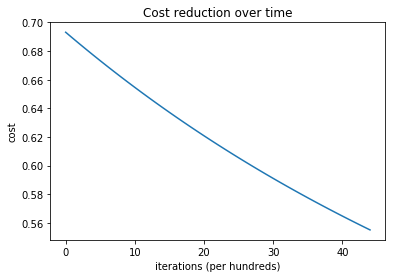

In [61]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
clf = LogisticRegression()

In [64]:
clf.fit(X_tr_arr, y_tr_arr)

/home/omkar/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:725: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
print (clf.intercept_, clf.coef_)

[0.15687679] [[-0.19831688 -0.83942692  2.1530196   2.22197768]]


In [66]:
pred = clf.predict(X_ts_arr)

In [67]:
print ('Accuracy from sk-learn: {0}'.format(clf.score(X_ts_arr, y_ts_arr)))

Accuracy from sk-learn: 0.85
